In [1]:
!git clone <https://github.com/anelsamadulla/rentalApartment.git>

/bin/bash: -c: line 1: syntax error near unexpected token `newline'
/bin/bash: -c: line 1: `git clone <https://github.com/anelsamadulla/rentalApartment.git>'


In [ ]:
pip install pandas Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.8 MB/s eta 0:00:00


In [ ]:
# Задание 1
import pandas as pd
import random
from faker import Faker

# Create an object Faker for generating random data
fake = Faker()

# List of street names to choose from
street_names = ["Республика", "Туран", "Кабанбай", "Сыганак", "Сарайшык", "Богенбай"]

# Create a list to store data as dictionaries
data_list = []

# Create a set to keep track of used street-building pairs
used_pairs = set()

# Dictionary to store previously assigned floors for each street and building combination
assigned_floors = {}

# Generate random data and add it to the list
for _ in range(200):
    # Generate a unique street-building pair
    while True:
        street = random.choice(street_names)
        building = random.randint(1, 55)
        pair = (street, building)
        if pair not in used_pairs:
            used_pairs.add(pair)
            break

    # Ensure the same floor for the same street and building combination
    if pair in assigned_floors:
        floor = assigned_floors[pair]
    else:
        floor = random.randint(1, 20)
        assigned_floors[pair] = floor

   # Generate "Площадь (кв. м)" and "Метраж жилой площади (кв. м)" with the required relationship
    total_area = round(random.uniform(70, 150), 2)
    living_area = max(round(random.uniform(0.8 * total_area, total_area - 10), 2), 0.01)  # Ensure living area is at least 80% of total area

    data_list.append({
        "Улица": street,
        "Дом": building,
        "Расстояние до центра (км)": round(random.uniform(1, 20), 2),
        "Площадь (кв. м)": total_area,
        "Количество комнат": random.randint(1, 5),
        "Метраж жилой площади (кв. м)": living_area,
        "Этаж": floor,
        "Наличие лифта": random.choice(["да", "нет"]),
        "Санузел": random.choice(["раздельный", "совместный"]),
        "Кухня студия": random.choice(["да", "нет"]),
        "Цена в месяц (тыс. тг)": random.randint(50000, 250000),
        "Дата аренды": fake.date_of_birth(minimum_age=18, maximum_age=60).strftime('%Y-%m-%d'),
        "Имя владельца": fake.name(),
        "Контактный номер": ''.join(random.choices("0123456789", k=11))
    })

# Create a DataFrame from the list of dictionaries
data = pd.DataFrame(data_list)

# Save the DataFrame to a CSV file
data.to_csv("apartments.csv", index=False)


In [ ]:
import pandas as pd

# Read the generated CSV file
data = pd.read_csv("apartments.csv")

# Define the rows where you want to delete values (e.g., rows 0, 2, and 4)
rows_to_delete_values = [0, 2, 4, 13, 15, 97, 113]

# Delete specific values in the "Расстояние до центра (км)" column
data.loc[rows_to_delete_values, "Расстояние до центра (км)"] = ""

# Delete specific values in the "Санузел" column
data.loc[rows_to_delete_values, "Санузел"] = ""

# Delete specific values in the "Цена в месяц (тыс. тг)" column
data.loc[rows_to_delete_values, "Цена в месяц (тыс. тг)"] = ""

# Save the modified DataFrame to a file
data.to_csv("apartments.csv", index=False)

In [ ]:
# Задание 2

import pandas as pd

# Read the generated CSV file
data = pd.read_csv("apartments.csv")

# Step 1: Change column names to shorter ones
# Create a mapping of new column names
new_column_names = {
    "Улица": "Ул",
    "Дом": "Дом",
    "Расстояние до центра (км)": "Расст.центра",
    "Площадь (кв. м)": "Площадь",
    "Количество комнат": "Комнаты",
    "Метраж жилой площади (кв. м)": "Жил.площадь",
    "Этаж": "Этаж",
    "Наличие лифта": "Лифт",
    "Санузел": "Санузел",
    "Кухня студия": "Кухня",
    "Цена в месяц (тыс. тг)": "Цена",
    "Дата аренды": "Дата",
    "Имя владельца": "Владелец",
    "Контактный номер": "Телефон"
}

# Rename the columns
data = data.rename(columns=new_column_names)

# Step 2: Obtain information about the type of columns and count of records
column_info = data.dtypes
record_counts = data.count()

# Check columns where the number of records does not match 200
columns_with_mismatched_records = record_counts[record_counts != 200]

# Print the information
print("Column Data Types:")
print(column_info)
print("\nColumns with Mismatched Record Counts:")
print(columns_with_mismatched_records)

# Save the modified DataFrame with updated column names
data.to_csv("apartments_modified.csv", index=False)


Column Data Types:
Ул               object
Дом               int64
Расст.центра    float64
Площадь         float64
Комнаты           int64
Жил.площадь     float64
Этаж              int64
Лифт             object
Санузел          object
Кухня            object
Цена            float64
Дата             object
Владелец         object
Телефон           int64
dtype: object

Columns with Mismatched Record Counts:
Расст.центра    193
Санузел         193
Цена            193
dtype: int64


In [ ]:
import pandas as pd

# Read the CSV file with modified column names
data = pd.read_csv("apartments_modified.csv")

# Function to fill missing values for Расстояние до центра (км)
def fill_distance_to_center(row):
    if pd.isna(row["Расст.центра"]):
        similar_rows = data[(data["Ул"] == row["Ул"])]

        if not similar_rows.empty:
            average_distance = similar_rows["Расст.центра"].mean()
            row["Расст.центра"] = average_distance

    return row

# Function to fill missing values for Санузел
def fill_bathroom_type(row):
    if pd.isna(row["Санузел"]):
        similar_rows = data[(data["Ул"] == row["Ул"])]

        if not similar_rows.empty:
            common_bathroom = similar_rows["Санузел"].mode()
            if not common_bathroom.empty:
                row["Санузел"] = common_bathroom[0]

    return row

# Function to fill missing values for Цена в месяц (тыс. тг)
def fill_price_per_month(row):
    if pd.isna(row["Цена"]):
        similar_rows = data[
            (data["Площадь"] >= row["Площадь"] - 10) &
            (data["Площадь"] <= row["Площадь"] + 10) &
            (data["Комнаты"] == row["Комнаты"]) &
            (data["Лифт"] == row["Лифт"])
        ]

        if not similar_rows.empty:
            average_price = similar_rows["Цена"].mean()
            row["Цена"] = average_price

    return row

# Apply the filling functions to the DataFrame
data = data.apply(fill_distance_to_center, axis=1)
data = data.apply(fill_bathroom_type, axis=1)
data = data.apply(fill_price_per_month, axis=1)

# Save the DataFrame with filled missing values to a new CSV file
data.to_csv("apartments_filled.csv", index=False)


In [ ]:
import pandas as pd

# Read the CSV file with filled missing values
data = pd.read_csv("apartments_filled.csv")

# Change the data type of "Дата аренды" to datetime
data['Дата'] = pd.to_datetime(data['Дата'])

# Map values in "Наличие лифта" and "Кухня студия" to bool
data['Лифт'] = data['Лифт'].map({'да': True, 'нет': False})
data['Кухня'] = data['Кухня'].map({'да': True, 'нет': False})

# Save the DataFrame with updated data types to a new CSV file
data.to_csv("apartments_data_types_updated.csv", index=False)


In [ ]:
# Задание 3

# Task1
# Calculate the "Средняя цена за кв. м" and add it as a new column
data['Средняя цена за кв. м'] = data['Цена'] / data['Площадь']

# Task2
# Create a new column for the floor category ('Этажность') in one line
data['Этажность'] = data['Этаж'].apply(lambda floor: 'first' if floor == 1 else 'last' if floor == data['Этаж'].max() else 'other')

# Task3
# Calculate the "Соотношение жилой и общей площади" and add it as a new column
data['Соотношение жилой и общей площади'] = (data['Жил.площадь'] / data['Площадь']).apply(lambda x: f"{int(x * 100)}/{int(100 - x * 100)}")


In [ ]:
data.head()

,Ул,Дом,Расст.центра,Площадь,Комнаты,Жил.площадь,Этаж,Лифт,Санузел,Кухня,Цена,Дата,Владелец,Телефон,Средняя цена за кв. м,Этажность,Соотношение жилой и общей площади
0,Республика,50,10.185862,129.45,4,103.96,9,False,совместный,False,170895.00,1997-10-17,Melissa Chavez,71766252463,1320.162225,other,80/19
1,Туран,2,16.720000,122.43,5,101.25,19,True,раздельный,False,128241.00,2002-02-23,Jon Simmons,73768447775,1047.463857,other,82/17
2,Богенбай,21,11.017813,131.91,1,108.79,16,True,раздельный,False,141361.00,1999-07-12,Dana Miller,77306758542,1071.647335,other,82/17
3,Сарайшык,36,10.950000,100.57,5,80.49,3,False,совместный,True,198466.00,2000-04-04,Michael Rodriguez,30354348916,1973.411554,other,80/19
4,Республика,2,10.185862,145.17,1,128.13,13,True,совместный,False,169028.75,1969-10-15,Joshua Johnson,1462435617,1164.350417,other,88/11


Average rent price for all three-bedroom apartments: 162252.24 тг
Average rent price for three-bedroom apartments by address:
Ул
Богенбай      167181.000000
Кабанбай      211054.250000
Республика    154112.000000
Сарайшык      150834.250000
Сыганак        93846.000000
Туран         173675.222222
Name: Цена, dtype: float64
Maximum rent price: 249776.00 тг
Address with the cheapest rent for a two-bedroom apartment: Богенбай
Range of rent prices for one-bedroom apartments with an elevator: 187982.00 тг


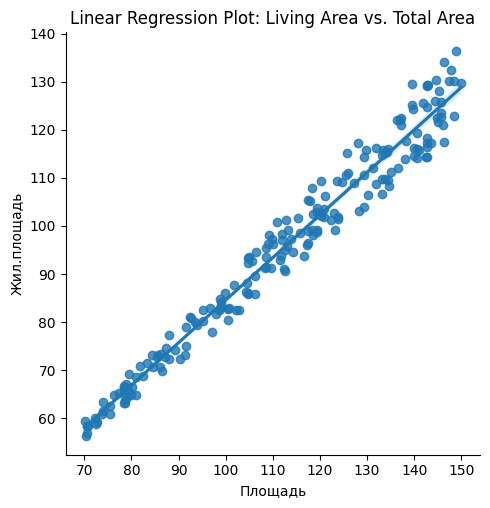

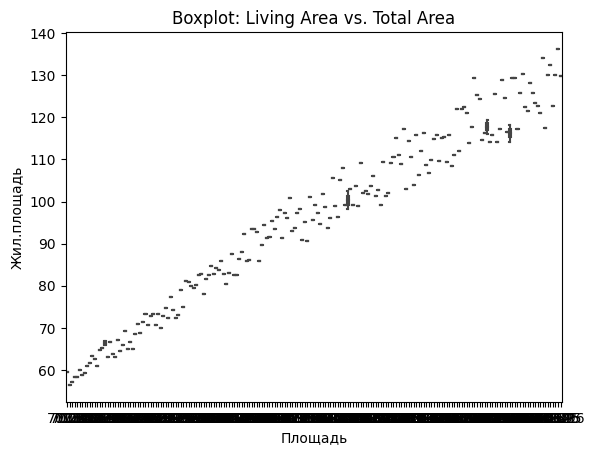

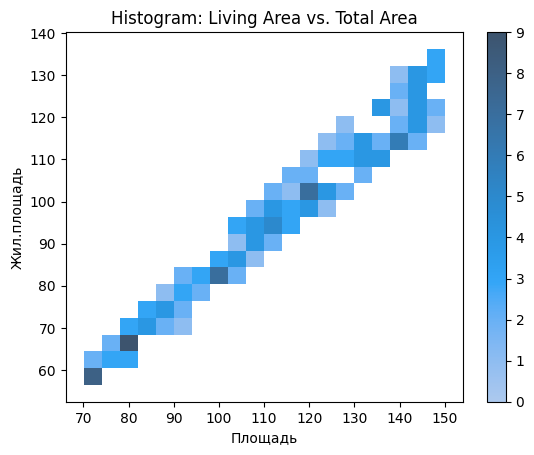

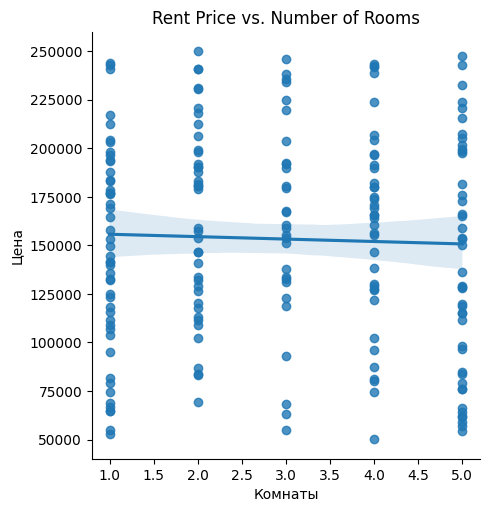

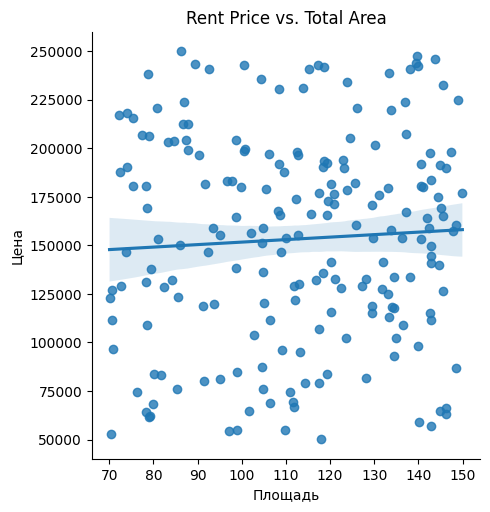

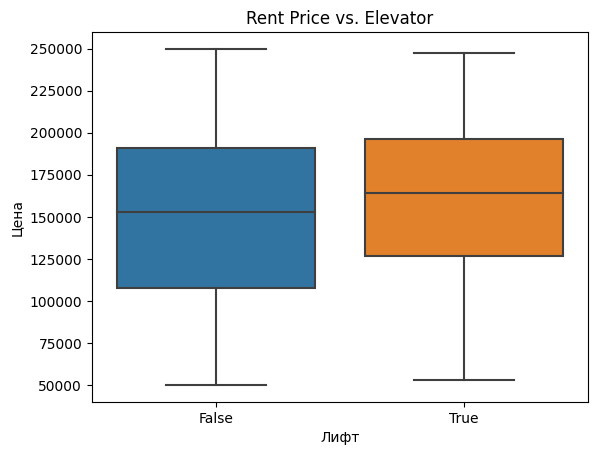

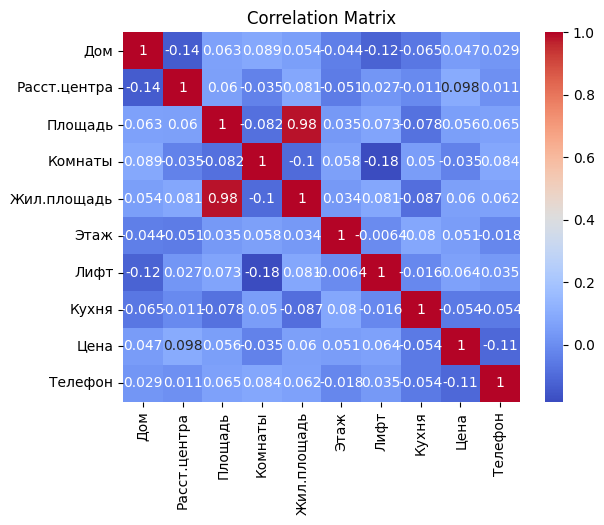

In [ ]:
#Задание 4

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the updated CSV file
data = pd.read_csv("apartments_data_types_updated.csv")

# Task 1: Calculate statistics

# Average rent price for all three-bedroom apartments
avg_rent_3br = data[data['Комнаты'] == 3]['Цена'].mean()
print(f"Average rent price for all three-bedroom apartments: {avg_rent_3br:.2f} тг")

# Average rent price for three-bedroom apartments by address
avg_rent_3br_by_address = data[data['Комнаты'] == 3].groupby('Ул')['Цена'].mean()
print("Average rent price for three-bedroom apartments by address:")
print(avg_rent_3br_by_address)

# Maximum rent price
max_rent = data['Цена'].max()
print(f"Maximum rent price: {max_rent:.2f} тг")

# Address with the cheapest rent for a two-bedroom apartment
cheapest_2br = data[data['Комнаты'] == 2]['Цена'].idxmin()
cheapest_2br_address = data.loc[cheapest_2br, 'Ул']
print(f"Address with the cheapest rent for a two-bedroom apartment: {cheapest_2br_address}")

# Range (spread) of rent prices for one-bedroom apartments with an elevator
one_br_with_lift = data[(data['Комнаты'] == 1) & (data['Лифт'] == True)]
range_one_br_with_lift = one_br_with_lift['Цена'].max() - one_br_with_lift['Цена'].min()
print(f"Range of rent prices for one-bedroom apartments with an elevator: {range_one_br_with_lift:.2f} тг")

# Task 2: Evaluate living area vs. total area

sns.lmplot(x='Площадь', y='Жил.площадь', data=data)
plt.title('Linear Regression Plot: Living Area vs. Total Area')
plt.show()

sns.boxplot(x='Площадь', y='Жил.площадь', data=data)
plt.title('Boxplot: Living Area vs. Total Area')
plt.show()

sns.histplot(data=data, x='Площадь', y='Жил.площадь', bins=20, cbar=True)
plt.title('Histogram: Living Area vs. Total Area')
plt.show()

# Task 3: Plot the relationships

sns.lmplot(x='Комнаты', y='Цена', data=data)
plt.title('Rent Price vs. Number of Rooms')
plt.show()

sns.lmplot(x='Площадь', y='Цена', data=data)
plt.title('Rent Price vs. Total Area')
plt.show()

sns.boxplot(x='Лифт', y='Цена', data=data)
plt.title('Rent Price vs. Elevator')
plt.show()

# Task 4: Calculate correlation matrix
corr_matrix = data.corr(numeric_only=True)  # Set numeric_only to True to avoid the warning
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
